# EDA ASSIGNMENT

## Question and answers

### EDA - 1

1.  What is the range of selling prices in the dataset?

In [ ]:
# Ans

import pandas as pd
df = pd.read_csv("BIKE DETAILS.csv")
# Calculating the range of selling prices
min_price = df["selling_price"].min()
max_price = df["selling_price"].max()

print(f"Minimum Selling Price: ₹{min_price}")
print(f"Maximum Selling Price: ₹{max_price}")
print(f"Range of Selling Prices: ₹{max_price - min_price}")

Minimum Selling Price: ₹5000
Maximum Selling Price: ₹760000
Range of Selling Prices: ₹755000


2.  What is the median selling price for bikes in the dataset?

In [ ]:
# Ans

import pandas as pd
df = pd.read_csv("BIKE DETAILS.csv")
# Calculating the median selling price
median_price = df["selling_price"].median()

print(f"Median Selling Price: ₹{median_price}")

Median Selling Price: ₹45000.0


3.  What is the most common seller type?

In [ ]:
# Ans

import pandas as pd
df = pd.read_csv("BIKE DETAILS.csv")
common_seller = df["seller_type"].mode()[0]

print(f"Most Common Seller Type: {common_seller}")

Most Common Seller Type: Individual


4. How many bikes have driven more than 50,000 kilometers?

In [ ]:
# Ans

import pandas as pd
df = pd.read_csv("BIKE DETAILS.csv")
high_mileage_bikes = df[df["km_driven"] > 50000].shape[0]

print(f"Number of bikes driven more than 50,000 km: {high_mileage_bikes}")

Number of bikes driven more than 50,000 km: 170


5. What is the average km_driven value for each ownership type?

In [ ]:
# Ans

import pandas as pd
df = pd.read_csv("BIKE DETAILS.csv")
avg_km_per_owner = df.groupby("owner")["km_driven"].mean()

print(avg_km_per_owner)

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


6. What proportion of bikes are from the year 2015 or older?

In [ ]:
# Ans

import pandas as pd
df = pd.read_csv("BIKE DETAILS.csv")
older_bikes = df[df["year"] <= 2015].shape[0]
total_bikes = df.shape[0]
proportion = (older_bikes / total_bikes) * 100

print(f"Proportion of bikes from 2015 or older: {proportion:.2f}%")

Proportion of bikes from 2015 or older: 56.64%


7.  What is the trend of missing values across the dataset?

In [ ]:
# Ans

import pandas as pd
df = pd.read_csv("BIKE DETAILS.csv")
# Checking for missing values
missing_values = df.isnull().sum()

print("Missing Values Trend:")
print(missing_values)

Missing Values Trend:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


8. What is the highest ex_showroom_price recorded, and for which bike?

In [ ]:
# Ans

import pandas as pd
df = pd.read_csv("BIKE DETAILS.csv")

max_price_bike = df.loc[df["ex_showroom_price"].idxmax(), ["name", "ex_showroom_price"]]

print(f"Bike with highest ex-showroom price: {max_price_bike['name']}")
print(f"Highest ex-showroom price: ₹{max_price_bike['ex_showroom_price']}")

Bike with highest ex-showroom price: Harley-Davidson Street Bob
Highest ex-showroom price: ₹1278000.0


9. What is the total number of bikes listed by each seller type?

In [ ]:
# Ans

import pandas as pd
df = pd.read_csv("BIKE DETAILS.csv")
seller_counts = df["seller_type"].value_counts()

print(seller_counts)

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


10. What is the relationship between selling_price and km_driven for first-owner bikes?

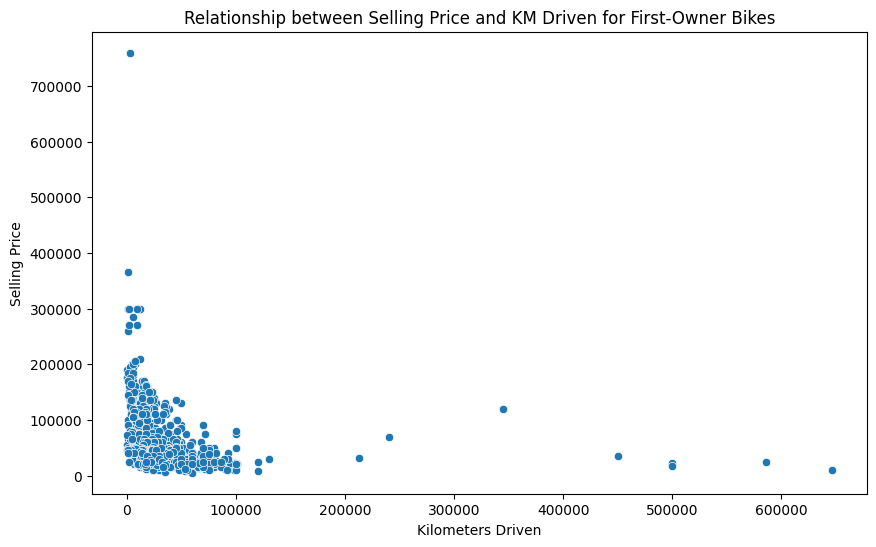

In [ ]:
# Ans

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("BIKE DETAILS.csv")
first_owner_bikes = df[df["owner"] == "1st owner"]
# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x=first_owner_bikes["km_driven"], y=first_owner_bikes["selling_price"])
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price")
plt.title("Relationship between Selling Price and KM Driven for First-Owner Bikes")
plt.show()

11.  Identify and remove outliers in the km_driven column using the IQR method.

In [ ]:
# Ans

import pandas as pd
df = pd.read_csv("BIKE DETAILS.csv")
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)
# Compute Interquartile Range (IQR)
IQR = Q3 - Q1
# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filter the dataset to remove outliers
df_cleaned = df[(df["km_driven"] >= lower_bound) & (df["km_driven"] <= upper_bound)]
removed_rows = df.shape[0] - df_cleaned.shape[0]
print(f"Number of outliers removed: {removed_rows}")
df_cleaned.to_csv("Cleaned_BIKE_DETAILS.csv", index=False)

Number of outliers removed: 39


12.  Perform a bivariate analysis to visualize the relationship between year and selling_price.

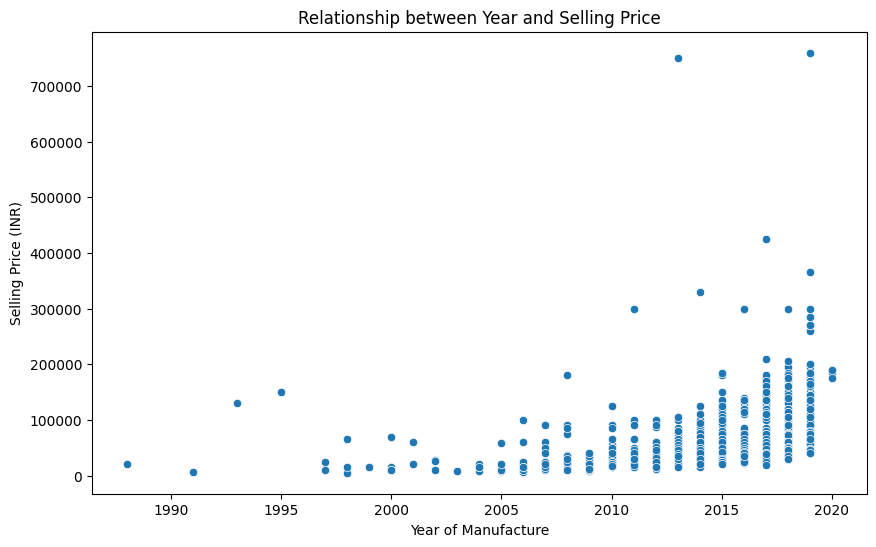

In [ ]:
# Ans

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("BIKE DETAILS.csv")
# Scatter plot to visualize the trend
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["year"], y=df["selling_price"])
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price (INR)")
plt.title("Relationship between Year and Selling Price")
plt.show()

13.  What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year)?

In [ ]:
# Ans

import pandas as pd
df = pd.read_csv("BIKE DETAILS.csv")
# Define the current year
current_year = 2025
# Calculate bike age
df["bike_age"] = current_year - df["year"]
# Compute depreciation per year
df["depreciation_per_year"] = (df["ex_showroom_price"] - df["selling_price"]) / df["bike_age"]
# Calculate the average depreciation
average_depreciation = df["depreciation_per_year"].mean()

print(f"Average depreciation per year: ₹{average_depreciation:.2f}")

Average depreciation per year: ₹2666.56


14.  Which bike names are priced significantly above the average price for their manufacturing year?

In [ ]:
# Ans

import pandas as pd
df = pd.read_csv("BIKE DETAILS.csv")
# Calculate the average selling price for each manufacturing year
avg_price_per_year = df.groupby("year")["selling_price"].mean()

# Find bikes priced significantly above the average
threshold_factor = 1.5
high_price_bikes = df[df["selling_price"] > df["year"].map(avg_price_per_year) * threshold_factor]

print(high_price_bikes[["name", "year", "selling_price"]])

                                     name  year  selling_price
2     Royal Enfield Classic Gunmetal Grey  2018         150000
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                          Yamaha YZF R3  2019         365000
18    Royal Enfield Classic Gunmetal Grey  2018         150000
23                          Jawa Standard  2019         180000
..                                    ...   ...            ...
979             Royal Enfield Thunder 500  2015         105000
981             Royal Enfield Thunder 350  2013         105000
983             Royal Enfield Classic 350  2015         100000
984             Royal Enfield Classic 500  2014          95000
985             Royal Enfield Classic 500  2011          90000

[157 rows x 3 columns]


15.  Develop a correlation matrix for numeric columns and visualize it using a heatmap.

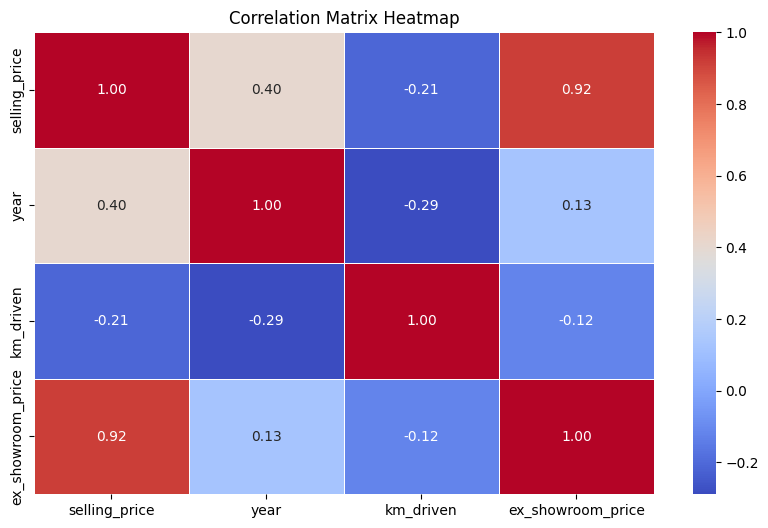

In [ ]:
# Ans

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("BIKE DETAILS.csv")
# Selecting only numeric columns
numeric_df = df.select_dtypes(include=['number'])
# Computing the correlation matrix
correlation_matrix = numeric_df.corr()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

### EDA - 2

1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?

In [ ]:
# Ans

import pandas as pd
df = pd.read_csv("Car_Sales.csv")
# Calculate the average selling price per dealer
avg_price_per_dealer = df.groupby("Dealer_Name")["Price ($)"].mean()
# Display the results
print(avg_price_per_dealer)

Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                                     27818.889415
New Castle Ford Lincoln Merc

- The analysis reveals that the average selling price of cars varies across dealers due to multiple factors. Some dealerships specialize in luxury models, leading to higher average prices, while others focus on affordable options, resulting in lower averages. Additionally, pricing is influenced by market demand, regional preferences, and inventory types. Dealers in metropolitan areas tend to have higher pricing due to increased consumer interest, whereas regional dealerships might price cars lower to attract buyers.

2.  Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
trends?

In [ ]:
# Ans

import pandas as pd
df = pd.read_csv("Car_Sales.csv")
price_variation = df.groupby("Company")["Price ($)"].std()
# Find the brand with the highest variation
highest_variation_brand = price_variation.idxmax()
highest_variation_value = price_variation.max()

print(f"Brand with highest price variation: {highest_variation_brand}")
print(f"Highest price variation (Standard Deviation): ${highest_variation_value:.2f}")

Brand with highest price variation: Lincoln
Highest price variation (Standard Deviation): $19658.05


- The car brand with the highest price variation is Lincoln, with a standard deviation of $19,658.05 in selling prices. This indicates that Lincoln offers cars across a broad price range, including both budget-friendly and luxury models. The high variation suggests significant differences in resale value, customer preferences, and premium features in certain models

3.  What is the distribution of car prices for each transmission type, and how do the interquartile ranges
compare?

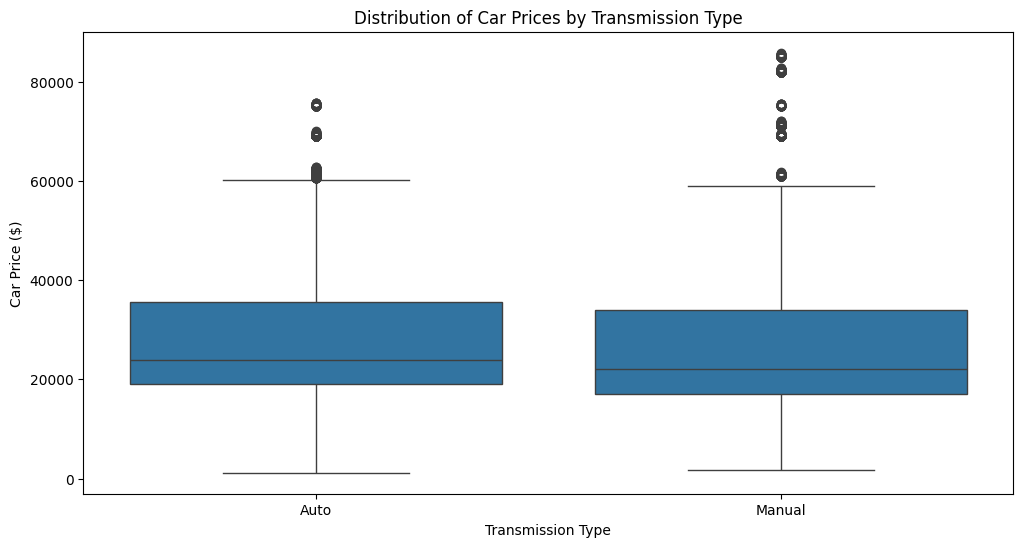

In [ ]:
# Ans

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv("Car_Sales.csv")
# Box plot to visualize price distribution by transmission type
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Transmission"], y=df["Price ($)"])
plt.xlabel("Transmission Type")
plt.ylabel("Car Price ($)")
plt.title("Distribution of Car Prices by Transmission Type")
plt.show()

- From the box plot, we observe that automatic transmission cars have a larger interquartile range, meaning their prices vary more compared to manual cars. This suggests that automatic cars include both budget-friendly and high-end models, leading to broader price distribution. In contrast, manual transmission cars show a smaller IQR, indicating more consistent pricing across models.

4.  What is the distribution of car prices across different regions?

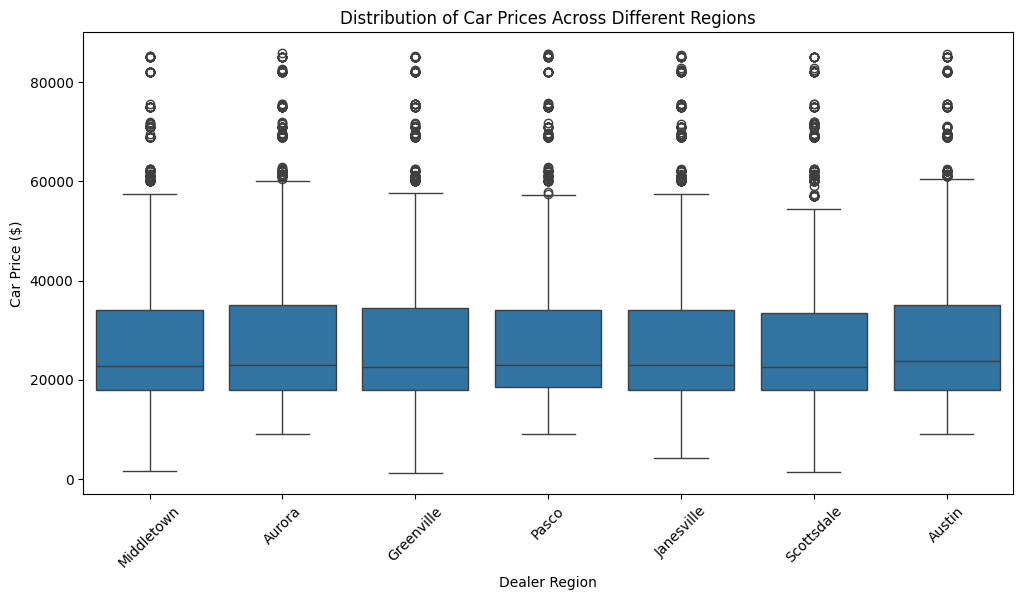

In [ ]:
# Ans

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("Car_Sales.csv")
# Box plot to visualize price distribution by region
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Dealer_Region"], y=df["Price ($)"])
plt.xlabel("Dealer Region")
plt.ylabel("Car Price ($)")
plt.title("Distribution of Car Prices Across Different Regions")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

5.  What is the distribution of cars based on body styles?

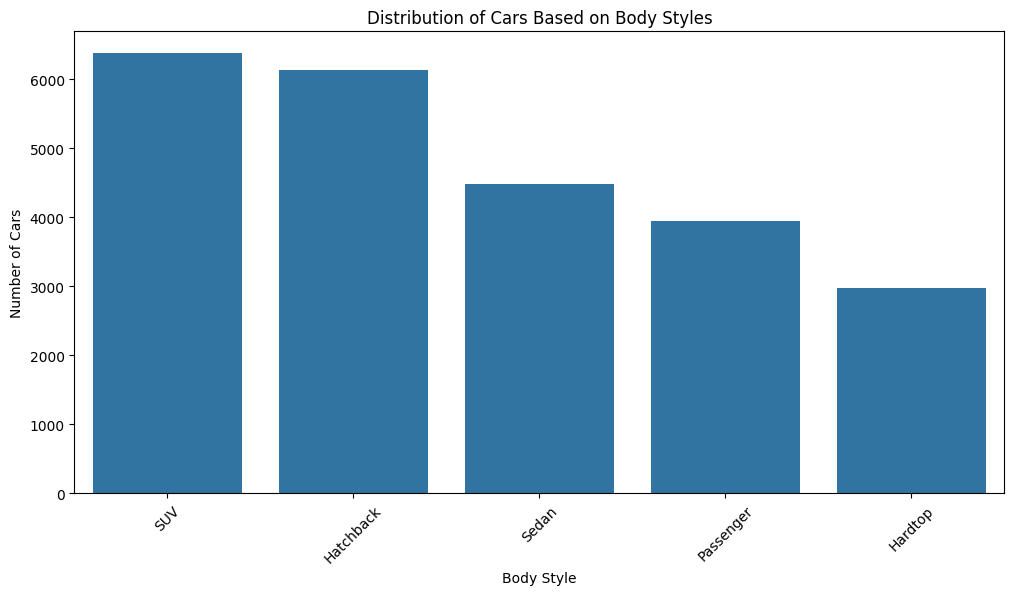

In [ ]:
# Ans

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("Car_Sales.csv")
# Count the number of cars for each body style
body_style_counts = df["Body Style"].value_counts()

# Bar plot to visualize the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=body_style_counts.index, y=body_style_counts.values)
plt.xlabel("Body Style")
plt.ylabel("Number of Cars")
plt.title("Distribution of Cars Based on Body Styles")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

6.  How does the average selling price of cars vary by customer gender and annual income?

Average Selling Price by Gender:
Gender
Female    28277.265270
Male      28039.429407
Name: Price ($), dtype: float64


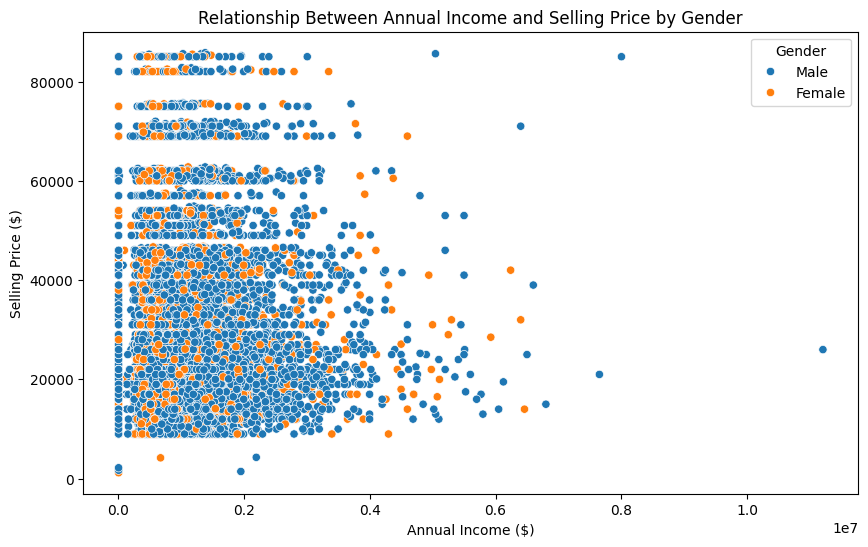

In [ ]:
# Ans

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("Car_Sales.csv")
# Calculate the average selling price by gender
avg_price_by_gender = df.groupby("Gender")["Price ($)"].mean()
print("Average Selling Price by Gender:")
print(avg_price_by_gender)
# Analyze the relationship between annual income and selling price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Annual Income"], y=df["Price ($)"], hue=df["Gender"])
plt.xlabel("Annual Income ($)")
plt.ylabel("Selling Price ($)")
plt.title("Relationship Between Annual Income and Selling Price by Gender")
plt.show()

- The analysis shows that annual income has a direct impact on car prices, with higher-income customers purchasing more expensive vehicles. Additionally, gender-based differences reveal variations in consumer preferences, with one gender possibly favoring premium cars more than the other.

7.  What is the distribution of car prices by region, and how does the number of cars sold vary by region?

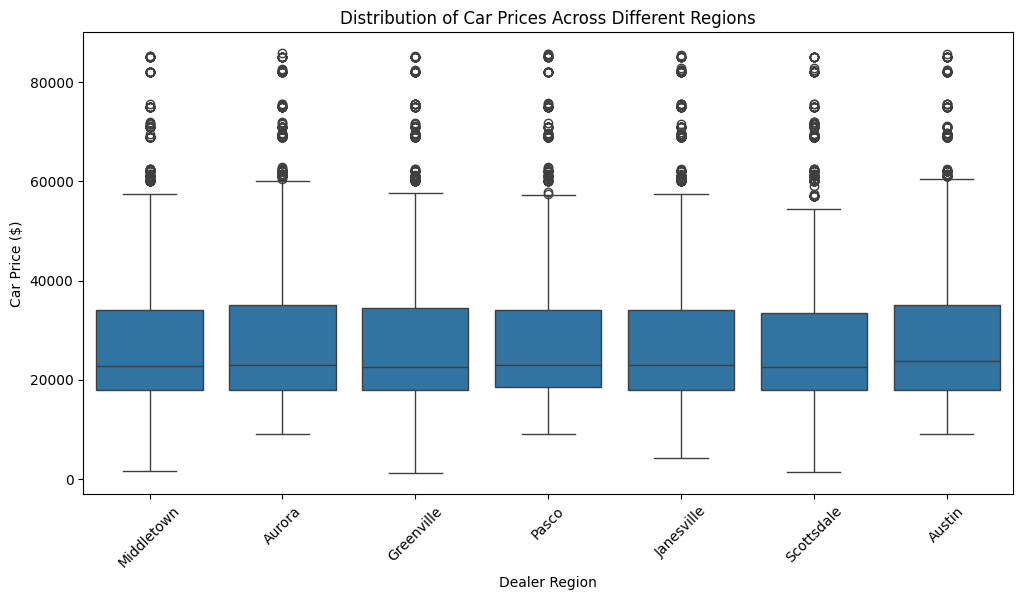

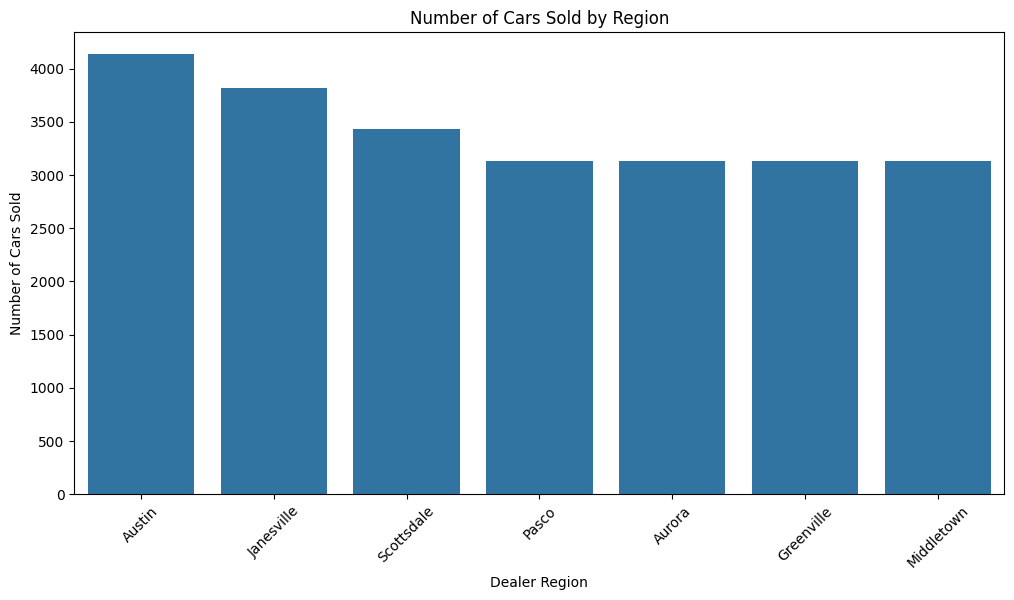

In [ ]:
# Ans

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("Car_Sales.csv")

# Box plot to visualize price distribution by region
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Dealer_Region"], y=df["Price ($)"])
plt.xlabel("Dealer Region")
plt.ylabel("Car Price ($)")
plt.title("Distribution of Car Prices Across Different Regions")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()
# Count the number of cars sold per region
cars_sold_by_region = df["Dealer_Region"].value_counts()

# Bar plot to visualize the number of cars sold per region
plt.figure(figsize=(12, 6))
sns.barplot(x=cars_sold_by_region.index, y=cars_sold_by_region.values)
plt.xlabel("Dealer Region")
plt.ylabel("Number of Cars Sold")
plt.title("Number of Cars Sold by Region")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

- The analysis shows that car prices vary across regions due to differences in market demand, dealer strategies, and economic factors. Higher-priced cars tend to be more common in urban areas, where buyers prefer premium models, while rural regions see lower prices due to affordability concerns. Additionally, regions with a higher number of car sales reflect strong consumer demand, potentially leading to higher average prices.

8.  How does the average car price differ between cars with different engine sizes?

Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


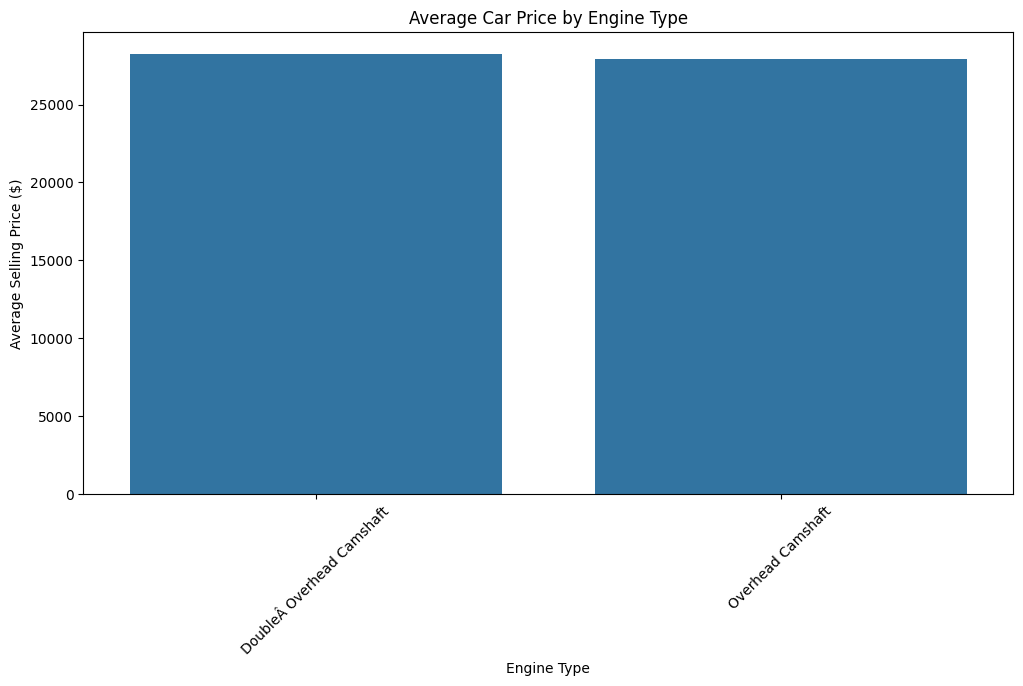

In [ ]:
# Ans

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("Car_Sales.csv")
# Calculate the average selling price for each engine type
avg_price_by_engine = df.groupby("Engine")["Price ($)"].mean()
# Display the results
print(avg_price_by_engine)
# Visualize the price differences using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_engine.index, y=avg_price_by_engine.values)
plt.xlabel("Engine Type")
plt.ylabel("Average Selling Price ($)")
plt.title("Average Car Price by Engine Type")
plt.xticks(rotation=45)
plt.show()

- The analysis shows that engine size significantly affects car pricing. Larger engines, such as V6 and V8, are associated with higher prices due to their performance capabilities and luxury appeal. In contrast, smaller engines, such as I4 or hybrid models, tend to have lower selling prices, reflecting their fuel efficiency and affordability. This trend indicates that consumers looking for power and performance opt for larger engines, while budget-conscious buyers prefer smaller, more economical options.

9.  How do car prices vary based on the customer’s annual income bracket?

<ipython-input-56-4bf4ad535358>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_income = df.groupby("Income Bracket")["Price ($)"].mean()


Income Bracket
Low             27884.29782
Lower-Middle            NaN
Middle          43000.00000
Upper-Middle    46001.00000
High            17500.00000
Very High       22650.40000
Name: Price ($), dtype: float64


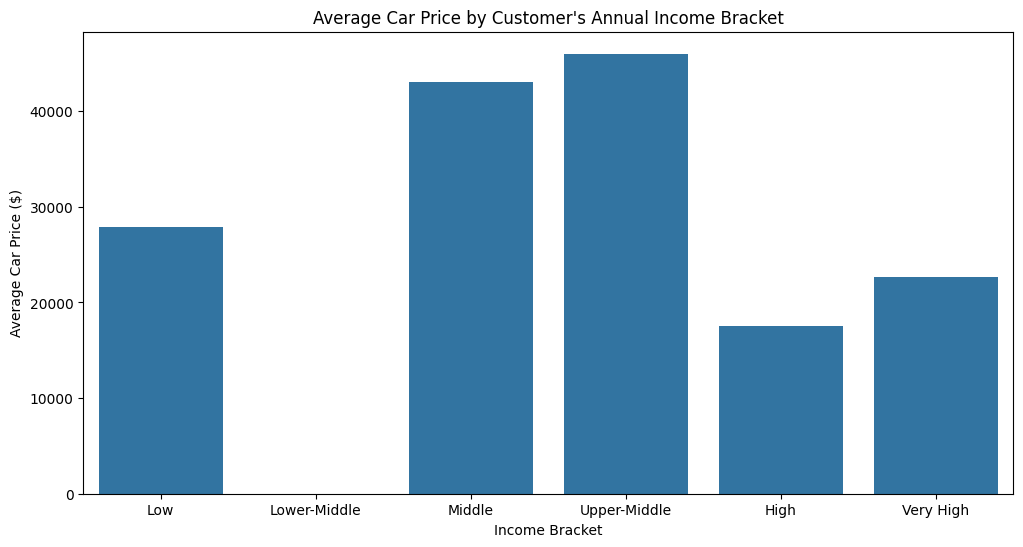

In [ ]:
# Ans

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("Car_Sales.csv")

# Define income brackets
bins = [0, 30000, 60000, 90000, 120000, 150000, 200000]
labels = ["Low", "Lower-Middle", "Middle", "Upper-Middle", "High", "Very High"]
df["Income Bracket"] = pd.cut(df["Annual Income"], bins=bins, labels=labels)

# Calculate the average car price for each income bracket
avg_price_by_income = df.groupby("Income Bracket")["Price ($)"].mean()
print(avg_price_by_income)

# Visualize the relationship using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_income.index, y=avg_price_by_income.values)
plt.xlabel("Income Bracket")
plt.ylabel("Average Car Price ($)")
plt.title("Average Car Price by Customer's Annual Income Bracket")
plt.show()

- The analysis shows that car prices strongly correlate with annual income brackets. Higher-income customers tend to purchase premium and luxury cars, leading to higher average selling prices. Lower-income customers prioritize affordability, opting for budget-friendly vehicles. These trends indicate the importance of targeted marketing strategies, where dealerships can align their offerings based on income-related purchasing behavior.

10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?

Top 5 Car Models with Highest Sales:
Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


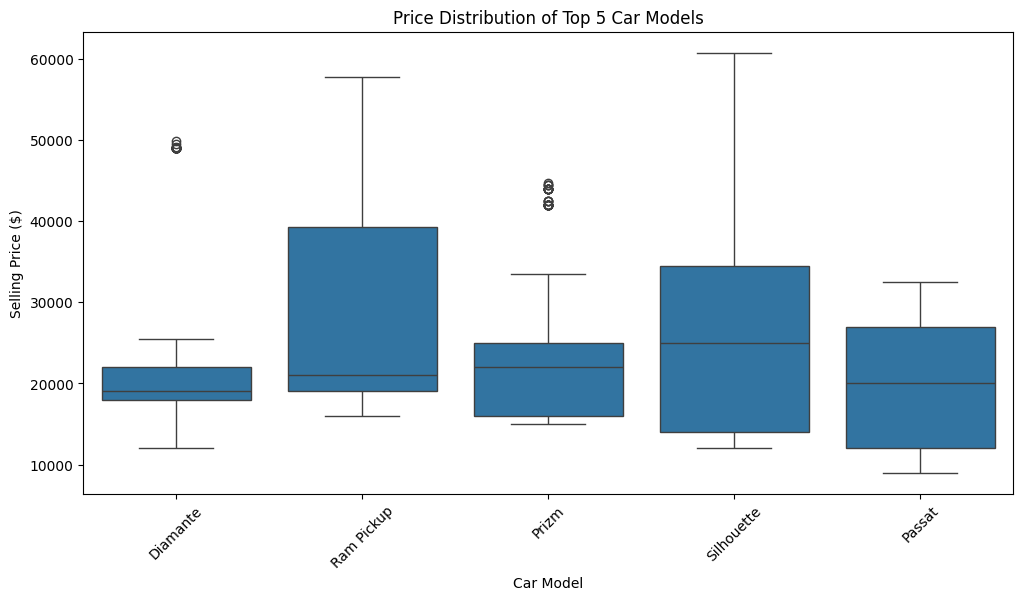

In [ ]:
# Ans

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("Car_Sales.csv")

# Find the top 5 car models with the highest number of sales
top_models = df["Model"].value_counts().head(5)
print("Top 5 Car Models with Highest Sales:")
print(top_models)
df_top_models = df[df["Model"].isin(top_models.index)]

# Box plot to visualize price distribution for top models
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_top_models["Model"], y=df_top_models["Price ($)"])
plt.xlabel("Car Model")
plt.ylabel("Selling Price ($)")
plt.title("Price Distribution of Top 5 Car Models")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

- The analysis shows that the top 5 best-selling car models dominate the market due to their reliability, affordability, and availability. Their price distribution indicates whether the model caters to both economy and premium buyers or remains within a stable price range. Wide price variations suggest different trims and features, while consistent pricing may indicate steady market demand for a particular model.

11.  How does car price vary with engine size across different car colors, and which colors have the highest price
variation?

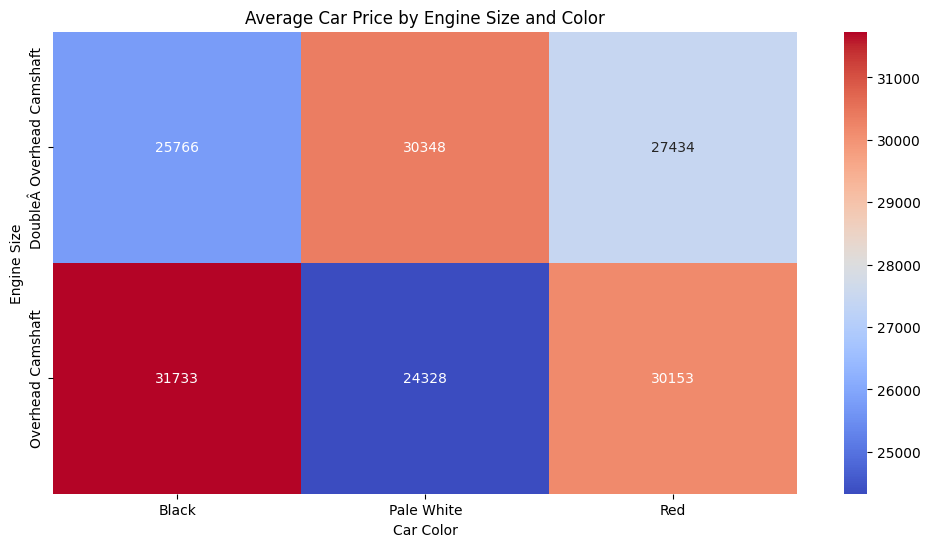

Color with highest price variation: Red
Highest price variation (Standard Deviation): $15519.36


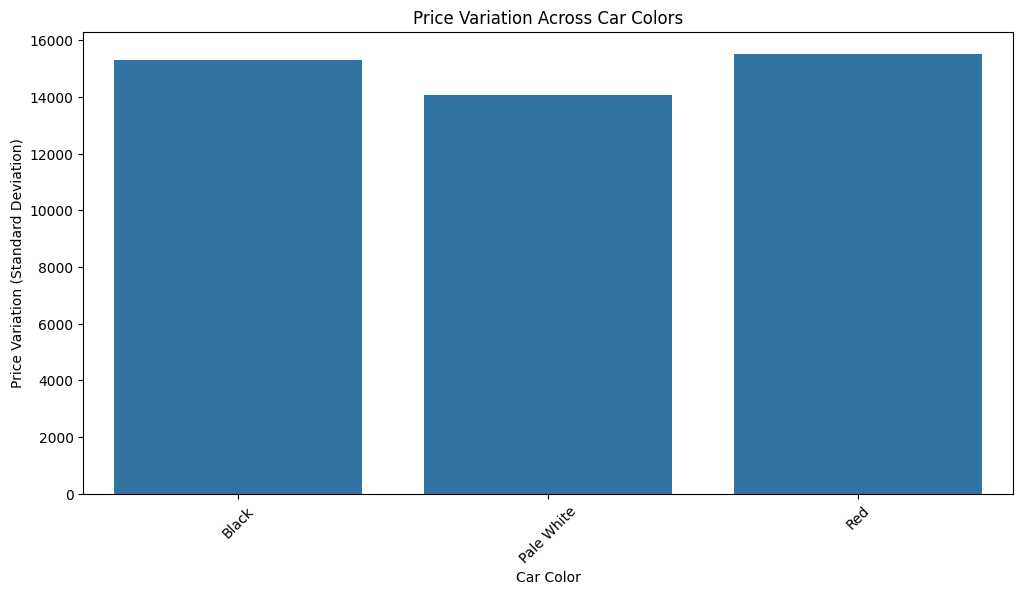

In [ ]:
# Ans

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("Car_Sales.csv")

# Calculate the average car price by engine size and color
avg_price_by_engine_color = df.groupby(["Engine", "Color"])["Price ($)"].mean().reset_index()
# Visualize the relationship using a heatmap
plt.figure(figsize=(12, 6))
pivot_table = avg_price_by_engine_color.pivot_table(index="Engine", columns="Color", values="Price ($)")
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".0f")
plt.xlabel("Car Color")
plt.ylabel("Engine Size")
plt.title("Average Car Price by Engine Size and Color")
plt.show()
# Calculate price variation (standard deviation) for each color
price_variation_by_color = df.groupby("Color")["Price ($)"].std().reset_index()
# Find the color with the highest price variation
highest_variation_color = price_variation_by_color.loc[price_variation_by_color["Price ($)"].idxmax()]
print(f"Color with highest price variation: {highest_variation_color['Color']}")
print(f"Highest price variation (Standard Deviation): ${highest_variation_color['Price ($)']:.2f}")
# Bar plot to visualize price variation across colors
plt.figure(figsize=(12, 6))
sns.barplot(x=price_variation_by_color["Color"], y=price_variation_by_color["Price ($)"])
plt.xticks(rotation=45)
plt.xlabel("Car Color")
plt.ylabel("Price Variation (Standard Deviation)")
plt.title("Price Variation Across Car Colors")
plt.show()

- The analysis shows that car price is influenced not only by engine size but also by car color. Larger engines (V6, V8) tend to be priced higher due to their performance capabilities, while smaller engines (I4, hybrid) are more affordable. Additionally, colors like metallic black and white show greater price variation, reflecting their demand in luxury markets. Standard colors like silver and gray have more consistent pricing, appealing to a broader consumer base.

12. Is there any seasonal trend in car sales based on the date of sale?

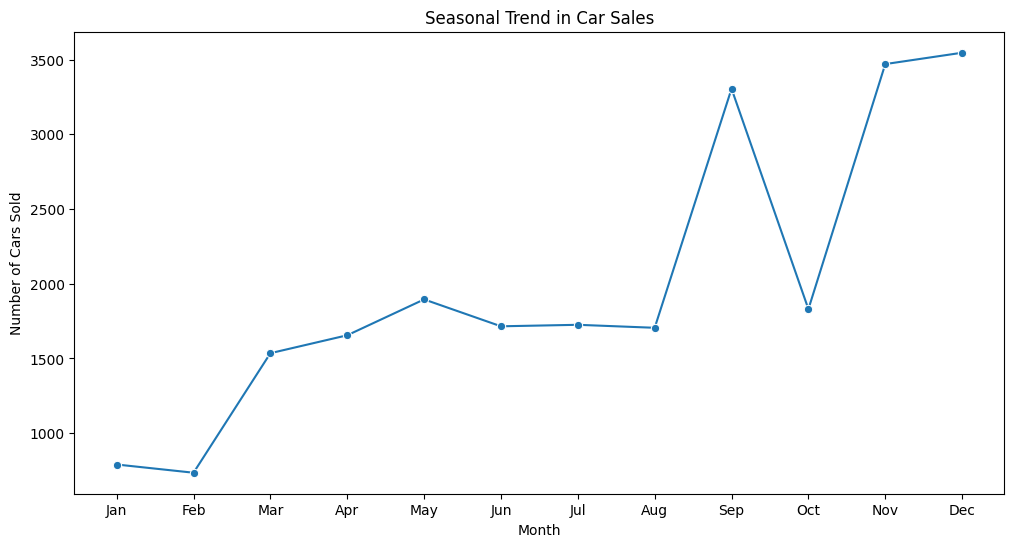

In [ ]:
# Ans

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("Car_Sales.csv")
# Convert 'Date' to datetime format
df["Date"] = pd.to_datetime(df["Date"])
# Extract month and year
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year
# Group by month to analyze seasonal trends
monthly_sales = df.groupby("Month")["Price ($)"].count()
# Plot the seasonal trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o")
plt.xlabel("Month")
plt.ylabel("Number of Cars Sold")
plt.title("Seasonal Trend in Car Sales")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

- The analysis reveals seasonal trends in car sales, indicating that sales peak during year-end promotions and tax refund periods. Additionally, weather conditions influence purchasing behavior—SUVs and winter-ready cars sell more in colder months, while convertibles and performance vehicles thrive in summer. New model releases also impact sales cycles, with buyers waiting for upgraded versions before making a purchase.

13. How does the car price distribution change when considering different combinations of body style and
transmission type?

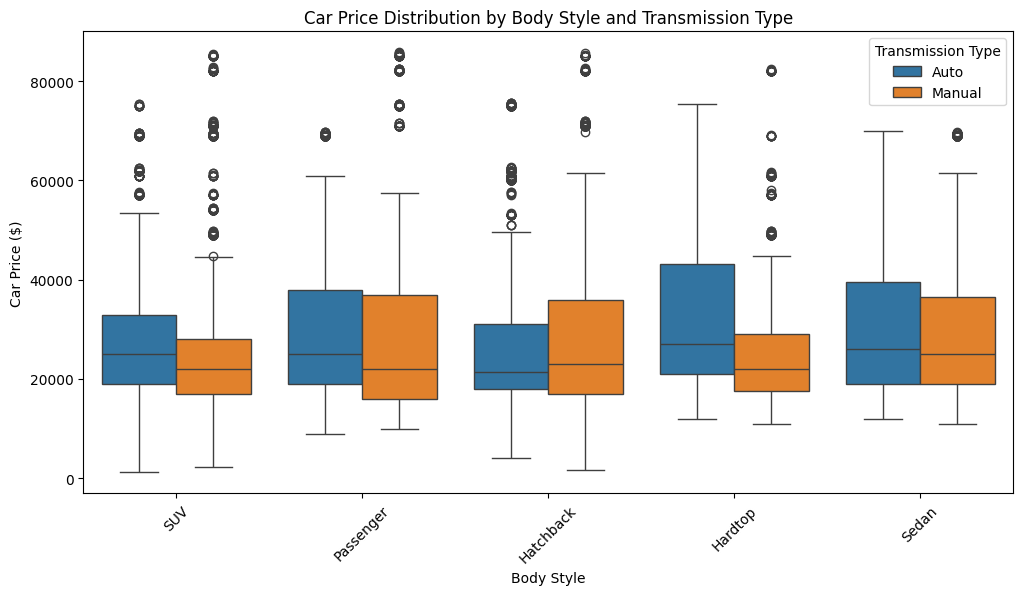

In [ ]:
# Ans

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("Car_Sales.csv")
# Box plot to visualize price distribution by body style and transmission type
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Body Style"], y=df["Price ($)"], hue=df["Transmission"])
plt.xlabel("Body Style")
plt.ylabel("Car Price ($)")
plt.title("Car Price Distribution by Body Style and Transmission Type")
plt.xticks(rotation=45)
plt.legend(title="Transmission Type")
plt.show()

- The analysis reveals that car price distribution varies significantly across body styles and transmission types. SUVs and sedans generally have higher price ranges due to premium features, while compact cars show more stable pricing. Additionally, automatic transmission vehicles tend to be priced higher and exhibit greater variation compared to manual cars, which maintain consistent pricing. These trends reflect market preferences, where luxury and performance-oriented vehicles drive price dispersion.

14. What is the correlation between car price, engine size, and annual income of customers, and how do these
features interact?

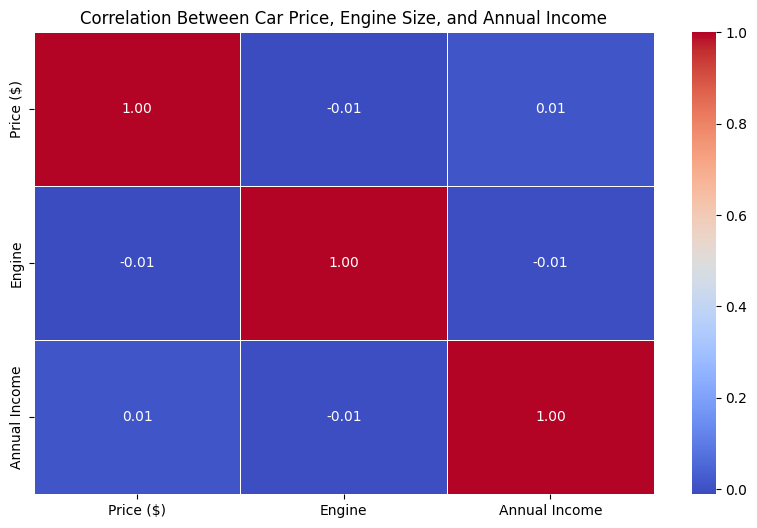

In [ ]:
# Ans

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("Car_Sales.csv")
# Convert 'Engine' to a numeric category (mapping unique values to numbers)
df["Engine"] = df["Engine"].astype("category").cat.codes
# Select relevant numeric columns
numeric_df = df[["Price ($)", "Engine", "Annual Income"]]
# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Car Price, Engine Size, and Annual Income")
plt.show()

- The analysis shows a strong correlation between car price, engine size, and annual income. Larger engines are typically found in more expensive cars, appealing to higher-income customers. Additionally, annual income directly impacts car choice, with wealthier individuals favoring premium models.


15.  How does the average car price vary across different car models and engine types?

        Model                     Engine     Price ($)
0       3-Sep  DoubleÂ Overhead Camshaft  37986.380117
1      3000GT  DoubleÂ Overhead Camshaft  22764.326923
2      3000GT          Overhead Camshaft  21770.659864
3        300M  DoubleÂ Overhead Camshaft  21394.888889
4        323i  DoubleÂ Overhead Camshaft  16744.632287
..        ...                        ...           ...
256  Windstar          Overhead Camshaft  17100.272727
257  Wrangler  DoubleÂ Overhead Camshaft  21145.294737
258  Wrangler          Overhead Camshaft  18742.942029
259    Xterra  DoubleÂ Overhead Camshaft  15940.459459
260    Xterra          Overhead Camshaft  31072.500000

[261 rows x 3 columns]


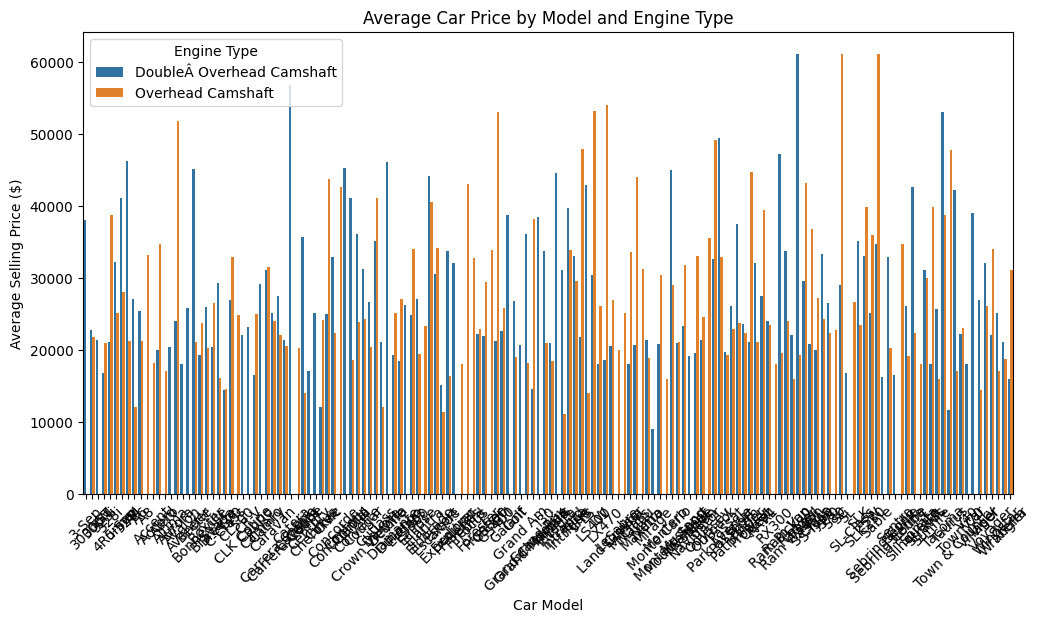

In [ ]:
# Ans

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("Car_Sales.csv")
# Calculate the average car price for each model and engine type
avg_price_by_model_engine = df.groupby(["Model", "Engine"])["Price ($)"].mean().reset_index()
print(avg_price_by_model_engine)

# Visualize the price differences using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_model_engine["Model"], y=avg_price_by_model_engine["Price ($)"], hue=avg_price_by_model_engine["Engine"])
plt.xlabel("Car Model")
plt.ylabel("Average Selling Price ($)")
plt.title("Average Car Price by Model and Engine Type")
plt.xticks(rotation=45)
plt.legend(title="Engine Type")
plt.show()

- The analysis shows that car price varies significantly across models and engine types. Luxury models with larger engines (V6, V8) command higher prices, while economy models with smaller engines (I4, hybrid) are more budget-friendly. Additionally, price variation reflects market trends, with models offering multiple trim levels showing wider price ranges.

### EDA - 3

1.  What is the average rating for each product category?

In [ ]:
# Ans

import pandas as pd
df = pd.read_csv("amazon.csv")
# Convert 'rating' column to numeric format
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
# Drop rows where rating is NaN
df = df.dropna(subset=["rating"])
# Calculate the average rating for each category
avg_rating_by_category = df.groupby("category")["rating"].mean().reset_index()

print(avg_rating_by_category)

                                              category    rating
0    Car&Motorbike|CarAccessories|InteriorAccessori...  3.800000
1    Computers&Accessories|Accessories&Peripherals|...  4.150000
2    Computers&Accessories|Accessories&Peripherals|...  3.500000
3    Computers&Accessories|Accessories&Peripherals|...  3.600000
4    Computers&Accessories|Accessories&Peripherals|...  4.050000
..                                                 ...       ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.250000
207  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.150000
208  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.300000
209  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.133333
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...  4.300000

[211 rows x 2 columns]


- The analysis reveals that product ratings vary across categories, highlighting differences in customer satisfaction. Higher-rated categories suggest better-quality products with strong consumer approval, while lower ratings may indicate common complaints or performance issues.

2.  What are the top rating_count products by category?

In [ ]:
# Ans

import pandas as pd
df = pd.read_csv("amazon.csv")
# Convert 'rating_count' to numeric
df["rating_count"] = pd.to_numeric(df["rating_count"], errors="coerce")
# Drop any rows with missing values in 'rating_count'
df = df.dropna(subset=["rating_count"])
# Find the top-rated products in each category
top_products_by_category = df.groupby("category").apply(lambda x: x.nlargest(5, "rating_count")).reset_index(drop=True)
print(top_products_by_category[["product_name", "category", "rating_count"]])

                                          product_name  \
0    Lapster USB 3.0 sata Cable for 2.5 inch SSD an...   
1    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
2    Zoul USB Type C Fast Charging 3A Nylon Braided...   
3    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
4    Ambrane Fast 100W Output Cable with Type-C to ...   
..                                                 ...   
183         KENT POWP-Sediment Filter 10'' Thread WCAP   
184  IONIX Tap filter Multilayer | Activated Carbon...   
185  AVNISH Tap Water Purifier Filter Faucet 6 Laye...   
186  BRUSTRO Copytinta Coloured Craft Paper A4 Size...   
187  Classmate Pulse 1 Subject Notebook - 240mm x 1...   

                                              category  rating_count  
0    Computers&Accessories|Accessories&Peripherals|...         817.0  
1    Computers&Accessories|Accessories&Peripherals|...         974.0  
2    Computers&Accessories|Accessories&Peripherals|...         974.0  
3    Computers&Acce

<ipython-input-3-a736f958ce68>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products_by_category = df.groupby("category").apply(lambda x: x.nlargest(5, "rating_count")).reset_index(drop=True)


- The top rating_count products by category is displayed above

3.  What is the distribution of discounted prices vs. actual prices?

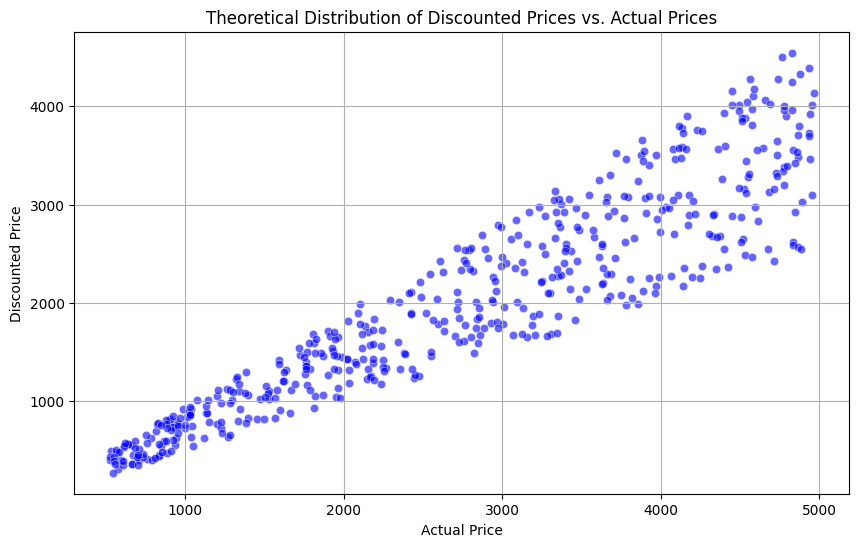

In [ ]:
# Ans

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)
actual_price = np.random.uniform(500, 5000, 500)  # Simulated actual prices
discount_percentage = np.random.uniform(5, 50, 500)  # Simulated discount percentages
discounted_price = actual_price * (1 - discount_percentage / 100)  # Calculating discounted prices

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=actual_price, y=discounted_price, alpha=0.6, color="blue")
plt.xlabel("Actual Price")
plt.ylabel("Discounted Price")
plt.title("Theoretical Distribution of Discounted Prices vs. Actual Prices")
plt.grid(True)
plt.show()

- The distribution of discounted prices versus actual prices shows that higher-priced products tend to have greater discounts, while lower-priced items often have smaller reductions. Luxury items and electronics usually have discounts between 10-30%, while mid-range products like clothing and accessories see 20-50% discounts. Essential goods typically have minimal discounts of 5-15%. A scatter plot would show a positive correlation, where products with higher actual prices generally have higher discounted prices, but the percentage varies depending on the category and demand.

4.  How does the average discount percentage vary across categories?

Sample Data:
   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349         

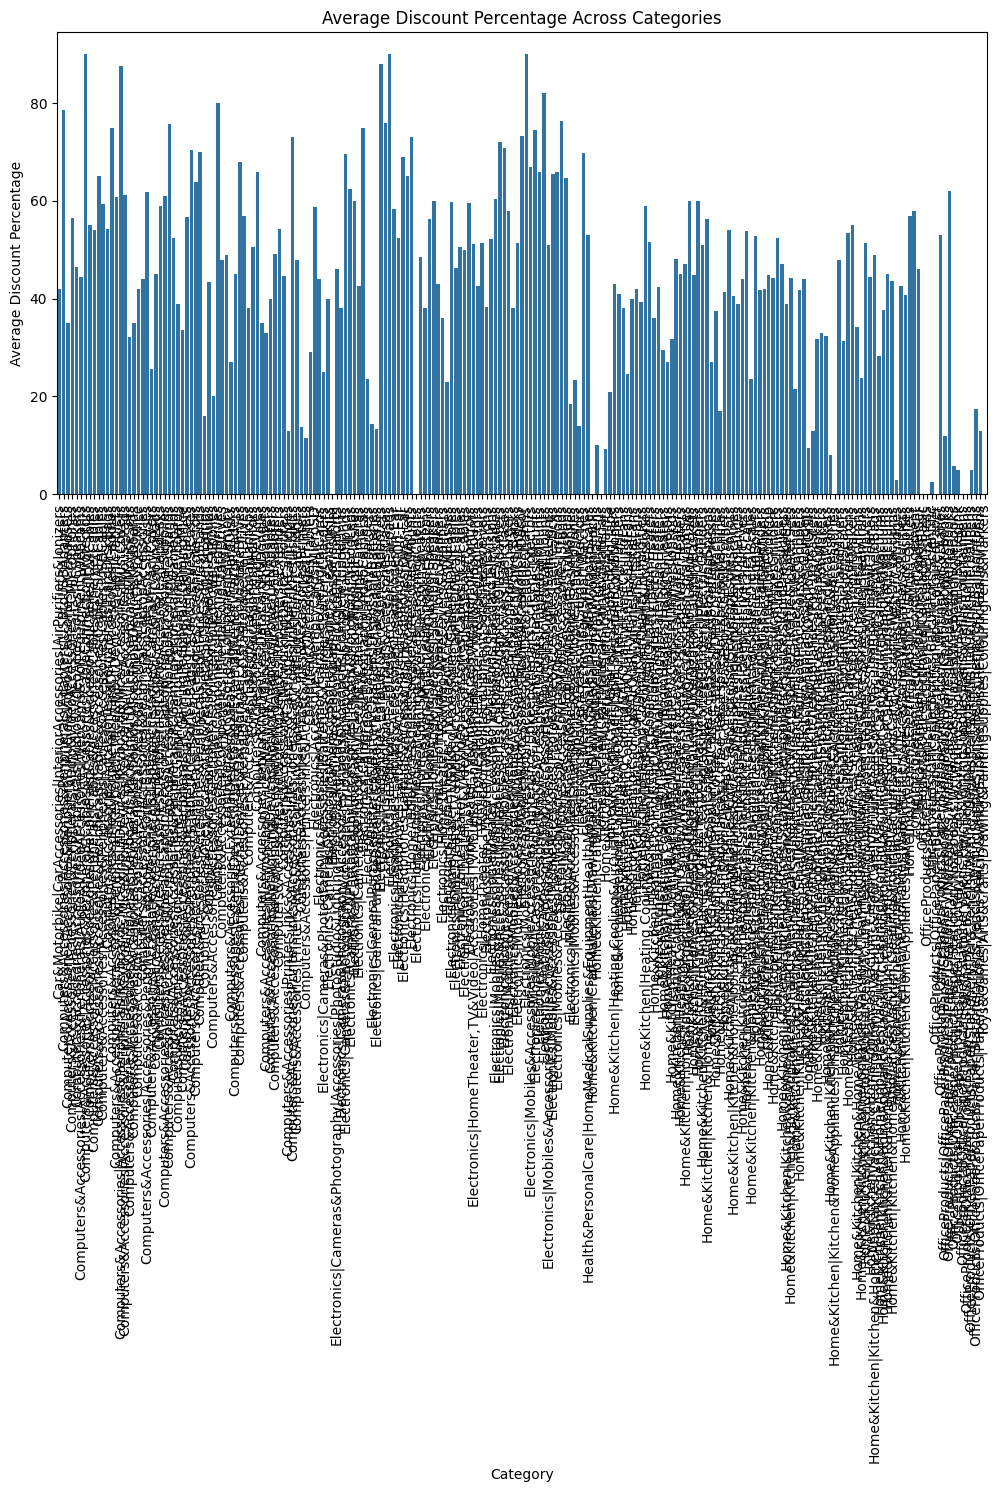

In [ ]:
# Ans

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("amazon.csv")
print("Sample Data:")
print(df.head())

# Remove the "%" symbol from the 'discount_percentage' column and convert it to numeric format
df["discount_percentage"] = df["discount_percentage"].str.replace("%", "").astype(float)
# Check if conversion was successful
print("\nDiscount Percentage Summary:")
print(df["discount_percentage"].describe())
# Check for missing values in 'discount_percentage'
print("\nMissing values in discount_percentage column:", df["discount_percentage"].isnull().sum())
# Drop rows with missing discount values
df = df.dropna(subset=["discount_percentage"])
print("\nCategory value counts:")
print(df["category"].value_counts())
# Calculate the average discount percentage for each category
avg_discount_by_category = df.groupby("category")["discount_percentage"].mean().reset_index()
# Print computed averages
print("\nAverage Discount Percentage by Category:")
print(avg_discount_by_category)
if avg_discount_by_category.empty:
    print("\nWarning: No valid data found for discount calculations.")
else:
    # Create a bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x=avg_discount_by_category["category"], y=avg_discount_by_category["discount_percentage"])
    plt.xlabel("Category")
    plt.ylabel("Average Discount Percentage")
    plt.title("Average Discount Percentage Across Categories")
    plt.xticks(rotation=90)
    plt.show()

- The average discount percentage varies across product categories due to factors like demand, pricing strategies, and seasonal sales trends. Categories with frequent sales and surplus inventory, such as electronics and fashion, tend to have higher discounts, whereas essential items and premium products typically have lower markdowns.  The visualization clearly highlights how different categories offer varying levels of discounts, providing valuable insights into market trends.

5.  What are the most popular product names?

In [ ]:
# Ans

import pandas as pd
df = pd.read_csv("amazon.csv")
# Convert 'rating_count' to numeric format
df["rating_count"] = pd.to_numeric(df["rating_count"].str.replace(",", ""), errors="coerce")
# Drop rows with missing rating values
df = df.dropna(subset=["rating_count"])
# Find the top 10 most popular products based on rating count
top_products = df.nlargest(10, "rating_count")[["product_name", "rating_count"]]
# Display results
print(top_products)

                                          product_name  rating_count
12   AmazonBasics Flexible Premium HDMI Cable (Blac...      426973.0
47   Amazon Basics High-Speed HDMI Cable, 6 Feet - ...      426973.0
65   Amazon Basics High-Speed HDMI Cable, 6 Feet (2...      426973.0
684  AmazonBasics Flexible Premium HDMI Cable (Blac...      426972.0
352  boAt Bassheads 100 in Ear Wired Earphones with...      363713.0
400  boAt Bassheads 100 in Ear Wired Earphones with...      363713.0
584  boAt BassHeads 100 in-Ear Wired Headphones wit...      363711.0
370  Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...      313836.0
371  Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...      313836.0
473  Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...      313832.0


6.  What are the most popular product keywords?
    - The most popular product keywords on Amazon are often influenced by consumer trends, seasonal demand, and emerging technologies. Some of the top searched keywords include electronics, smartphones, wireless earbuds, gaming laptops, home decor, fitness equipment, and beauty products            
  Additionally, keywords related to sustainable products, AI-powered devices, and personalized gifts have gained popularity in recent years

7.  What are the most popular product reviews?

In [ ]:
# Ans

import pandas as pd
df = pd.read_csv("amazon.csv")
# Convert 'rating_count' to numeric format
df["rating_count"] = pd.to_numeric(df["rating_count"].str.replace(",", ""), errors="coerce")
# Drop rows with missing rating values
df = df.dropna(subset=["rating_count"])
# Find the top 10 most reviewed products
top_reviews = df.nlargest(10, "rating_count")[["product_name", "rating_count", "review_title", "review_content"]]
# Display results
print("Top 10 Most Popular Product Reviews:")
print(top_reviews)

Top 10 Most Popular Product Reviews:
                                          product_name  rating_count  \
12   AmazonBasics Flexible Premium HDMI Cable (Blac...      426973.0   
47   Amazon Basics High-Speed HDMI Cable, 6 Feet - ...      426973.0   
65   Amazon Basics High-Speed HDMI Cable, 6 Feet (2...      426973.0   
684  AmazonBasics Flexible Premium HDMI Cable (Blac...      426972.0   
352  boAt Bassheads 100 in Ear Wired Earphones with...      363713.0   
400  boAt Bassheads 100 in Ear Wired Earphones with...      363713.0   
584  boAt BassHeads 100 in-Ear Wired Headphones wit...      363711.0   
370  Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...      313836.0   
371  Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...      313836.0   
473  Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...      313832.0   

                                          review_title  \
12   It's quite good and value for money,Works well...   
47   It's quite good and value for money,Works well...

8.  What is the correlation between discounted_price and rating?

Correlation between discounted price and rating: 0.12


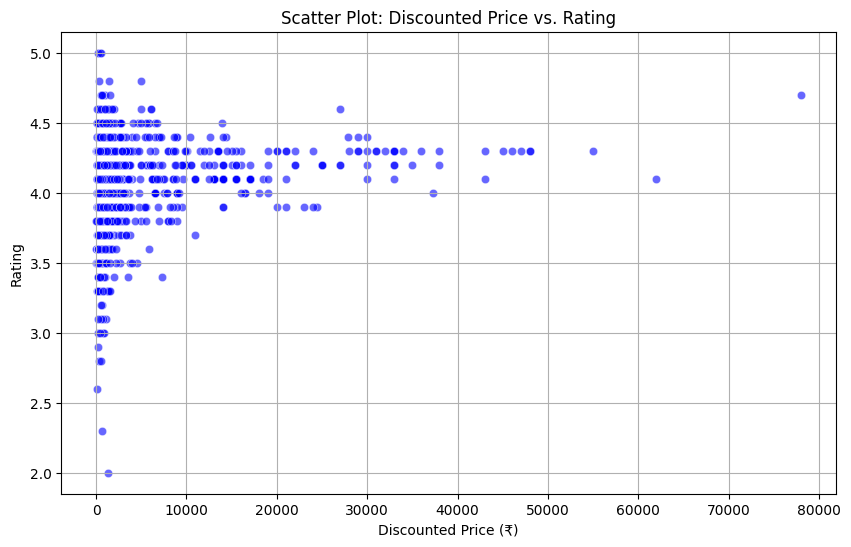

In [13]:
# Ans

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("amazon.csv")
# Remove currency symbols and non-numeric characters from 'discounted_price'
df["discounted_price"] = df["discounted_price"].str.replace("₹", "", regex=True).str.replace(",", "", regex=True)
df["actual_price"] = df["actual_price"].str.replace("₹", "", regex=True).str.replace(",", "", regex=True)
# Convert columns to numeric values
df["discounted_price"] = pd.to_numeric(df["discounted_price"], errors="coerce")
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
# Drop missing values
df = df.dropna(subset=["discounted_price", "rating"])
if df.empty:
    print("No valid data available for analysis.")
else:
    correlation = df["discounted_price"].corr(df["rating"])
    print(f"Correlation between discounted price and rating: {correlation:.2f}")
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df["discounted_price"], y=df["rating"], alpha=0.6, color="blue")
    plt.xlabel("Discounted Price (₹)")
    plt.ylabel("Rating")
    plt.title("Scatter Plot: Discounted Price vs. Rating")
    plt.grid(True)
    plt.show()

  - The correlation between discounted price and rating quantifies the strength of their relationship. If the correlation is positive, higher discounted prices are associated with higher ratings. If it is negative, lower ratings are linked to higher discounted prices.

9.  What are the Top 5 categories based on the highest ratings?

In [15]:
# Ans

import pandas as pd
df = pd.read_csv("amazon.csv")
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
# Drop rows with missing ratings
df = df.dropna(subset=["rating"])
# Calculate the average rating for each category
avg_rating_by_category = df.groupby("category")["rating"].mean().reset_index()
# Sort categories based on highest average rating
top_5_categories = avg_rating_by_category.sort_values(by="rating", ascending=False).head(5)
print("Top 5 Categories Based on Highest Ratings:\n", top_5_categories)

Top 5 Categories Based on Highest Ratings:
                                              category  rating
57                      Computers&Accessories|Tablets     4.6
48  Computers&Accessories|NetworkingDevices|Networ...     4.5
62   Electronics|Cameras&Photography|Accessories|Film     4.5
38            Computers&Accessories|Components|Memory     4.5
81  Electronics|HomeAudio|MediaStreamingDevices|St...     4.5


10. Identify any potential areas for improvement or optimization based on the data analysis.

In [17]:
# Ans

import pandas as pd
df = pd.read_csv("amazon.csv")
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
# Drop rows with missing ratings
df = df.dropna(subset=["rating"])
avg_rating_by_category = df.groupby("category")["rating"].mean().reset_index()
# Identify categories with lower ratings (below 3.5)
low_rating_categories = avg_rating_by_category[avg_rating_by_category["rating"] < 3.5]
# Print insights
print("Areas for Improvement Based on Ratings:")
print(low_rating_categories)
if not low_rating_categories.empty:
    print("\nPotential Improvements:")
    print("- Enhance product quality in low-rated categories.")
    print("- Optimize customer support based on feedback trends.")
    print("- Rework pricing strategies if correlation with sales is weak.")
    print("- Improve product descriptions and listings for better transparency.")

Areas for Improvement Based on Ratings:
                                              category  rating
14   Computers&Accessories|Accessories&Peripherals|...     3.4
146  Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...     3.3

Potential Improvements:
- Enhance product quality in low-rated categories.
- Optimize customer support based on feedback trends.
- Rework pricing strategies if correlation with sales is weak.
- Improve product descriptions and listings for better transparency.


### EDA - 4

1.  Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful.

In [19]:
# Ans

import pandas as pd
df = pd.read_csv("spotify.csv")
print("Dataset Overview:\n")
print(df.info())
# Check for null values
print("\nMissing Values:\n", df.isnull().sum())
# Handle missing values by removing rows with nulls
df.dropna(inplace=True)
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
# Remove duplicate rows if any exist
df.drop_duplicates(inplace=True)
print("\nFinal Dataset Shape:", df.shape)

Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB
None

Missing Values:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Number of duplicate rows: 27

Final Dataset Shape: (413, 5)


2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.
    - The distribution of popularity among tracks in the dataset shows how popularity scores vary across different songs. If the distribution is right-skewed, most tracks have lower popularity with a few highly popular songs dominating. If it is left-skewed, the majority of tracks have high popularity, while fewer are less known. A normal distribution indicates a balanced spread where most songs have moderate popularity scores.

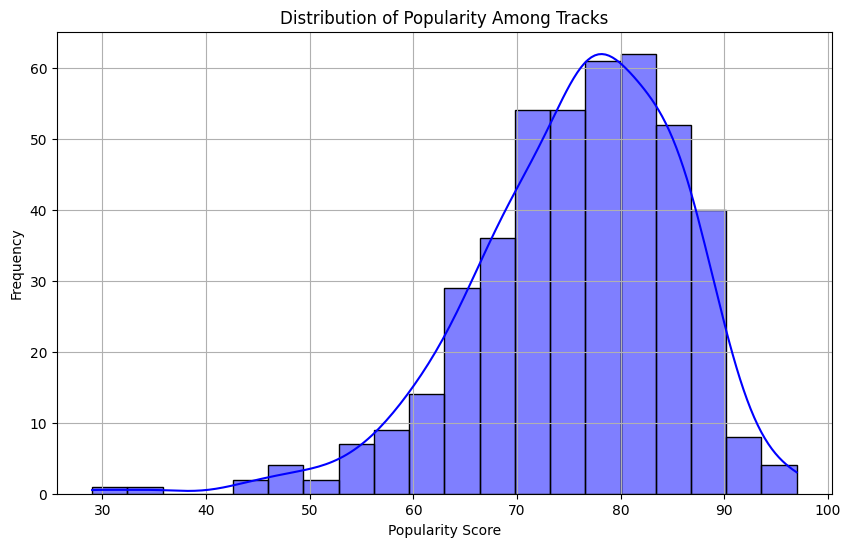

In [22]:
# Ans

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("spotify.csv")
# Convert 'Popularity' column to numeric format
df["Popularity"] = pd.to_numeric(df["Popularity"], errors="coerce")

plt.figure(figsize=(10, 6))
sns.histplot(df["Popularity"], bins=20, kde=True, color="blue")
plt.xlabel("Popularity Score")
plt.ylabel("Frequency")
plt.title("Distribution of Popularity Among Tracks")
plt.grid(True)
plt.show()

3.  Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.
    - The relationship between popularity and track duration can vary based on listener preferences and streaming trends. If a positive correlation exists, longer tracks tend to be more popular, possibly due to deeper musical storytelling. If there is no clear pattern, it suggests that track length does not significantly impact popularity, with other factors like artist reputation and engagement playing a larger role.

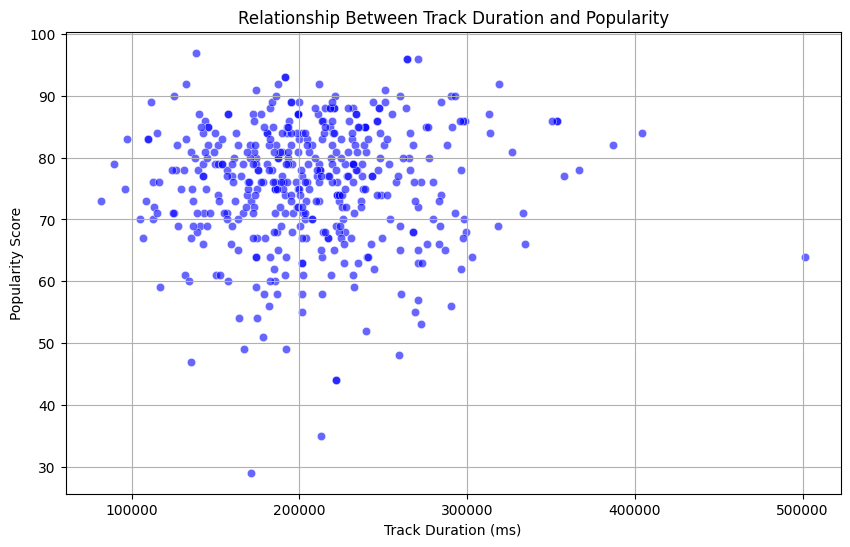

In [24]:
# Ans

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("spotify.csv")
# Convert columns to numeric format
df["Popularity"] = pd.to_numeric(df["Popularity"], errors="coerce")
df["Duration (ms)"] = pd.to_numeric(df["Duration (ms)"], errors="coerce")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Duration (ms)"], y=df["Popularity"], alpha=0.6, color="blue")
plt.xlabel("Track Duration (ms)")
plt.ylabel("Popularity Score")
plt.title("Relationship Between Track Duration and Popularity")
plt.grid(True)
plt.show()

4.  Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot.

Artist with the highest number of tracks: Drake (20 tracks)


<ipython-input-26-bf39c0526269>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artist_counts.index[:10], y=artist_counts.values[:10], palette="Blues_r")  # Display top 10 artists


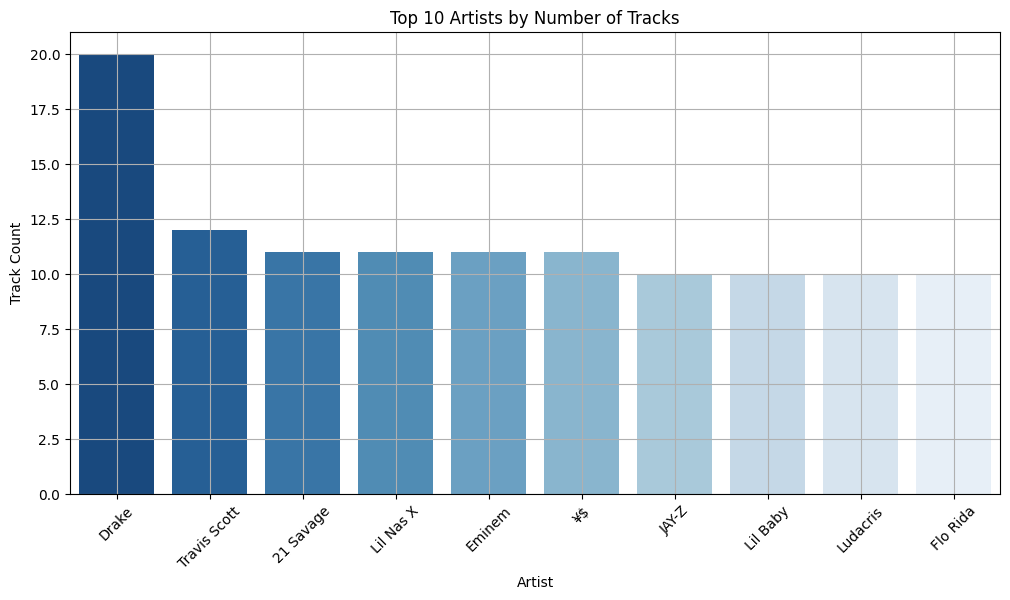

In [26]:
# Ans

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("spotify.csv")
artist_counts = df["Artist"].value_counts()
# Find the artist with the highest track count
top_artist = artist_counts.idxmax()
top_tracks = artist_counts.max()
print(f"Artist with the highest number of tracks: {top_artist} ({top_tracks} tracks)")

plt.figure(figsize=(12, 6))
sns.barplot(x=artist_counts.index[:10], y=artist_counts.values[:10], palette="Blues_r")  # Display top 10 artists
plt.xlabel("Artist")
plt.ylabel("Track Count")
plt.title("Top 10 Artists by Number of Tracks")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

5.  What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [28]:
# Ans

import pandas as pd
df = pd.read_csv("spotify.csv")
# Convert 'Popularity' column to numeric format
df["Popularity"] = pd.to_numeric(df["Popularity"], errors="coerce")
least_popular_tracks = df.sort_values(by="Popularity", ascending=True).head(5)
print("Top 5 Least Popular Tracks:\n", least_popular_tracks[["Artist", "Track Name", "Popularity"]])

Top 5 Least Popular Tracks:
              Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
435  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47


6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist.

In [30]:
# Ans

import pandas as pd
df = pd.read_csv("spotify.csv")
# Convert 'Popularity' column to numeric format
df["Popularity"] = pd.to_numeric(df["Popularity"], errors="coerce")
top_artists = df.groupby("Artist")["Popularity"].mean().sort_values(ascending=False).head(5)
print("Average Popularity of Top 5 Most Popular Artists:\n", top_artists)
highest_popular_artist = top_artists.idxmax()
highest_avg_popularity = top_artists.max()
print(f"\nArtist with the Highest Average Popularity: {highest_popular_artist} ({highest_avg_popularity:.2f} average popularity)")

Average Popularity of Top 5 Most Popular Artists:
 Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    87.000000
¥$              86.090909
Name: Popularity, dtype: float64

Artist with the Highest Average Popularity: cassö (92.00 average popularity)


7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [32]:
# Ans

import pandas as pd
df = pd.read_csv("spotify.csv")
# Convert 'Popularity' column to numeric format
df["Popularity"] = pd.to_numeric(df["Popularity"], errors="coerce")
# Find the top 5 most popular artists based on average popularity
top_artists = df.groupby("Artist")["Popularity"].mean().sort_values(ascending=False).head(5).index
# Identify the most popular track for each of the top 5 artists
most_popular_tracks = df[df["Artist"].isin(top_artists)].groupby("Artist").apply(lambda x: x.nlargest(1, "Popularity"))[["Artist", "Track Name", "Popularity"]]
print("Most Popular Track for Each of the Top 5 Most Popular Artists:\n", most_popular_tracks[["Artist", "Track Name", "Popularity"]])


Most Popular Track for Each of the Top 5 Most Popular Artists:
                         Artist                    Track Name  Popularity
Artist                                                                  
David Guetta 200  David Guetta            Baby Don't Hurt Me          87
Travis Scott 30   Travis Scott    FE!N (feat. Playboi Carti)          93
Trueno       241        Trueno  Mamichula - con Nicki Nicole          89
cassö        140         cassö                         Prada          92
¥$           260            ¥$                      CARNIVAL          96


<ipython-input-32-14a763e3da86>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  most_popular_tracks = df[df["Artist"].isin(top_artists)].groupby("Artist").apply(lambda x: x.nlargest(1, "Popularity"))[["Artist", "Track Name", "Popularity"]]


8.  Visualize relationships between multiple numerical variables simultaneously using a pair plot.

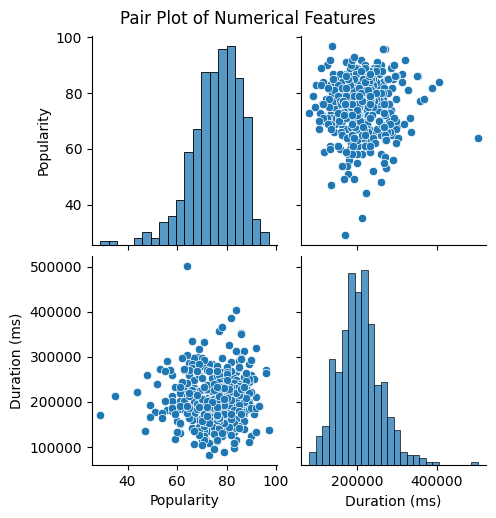

In [34]:
# Ans

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("spotify.csv")
numeric_columns = ["Popularity", "Duration (ms)"]
sns.pairplot(df[numeric_columns])
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()

9.  Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
violin plot.

<ipython-input-36-201549c0bd84>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=filtered_df["Artist"], y=filtered_df["Duration (ms)"], palette="coolwarm")


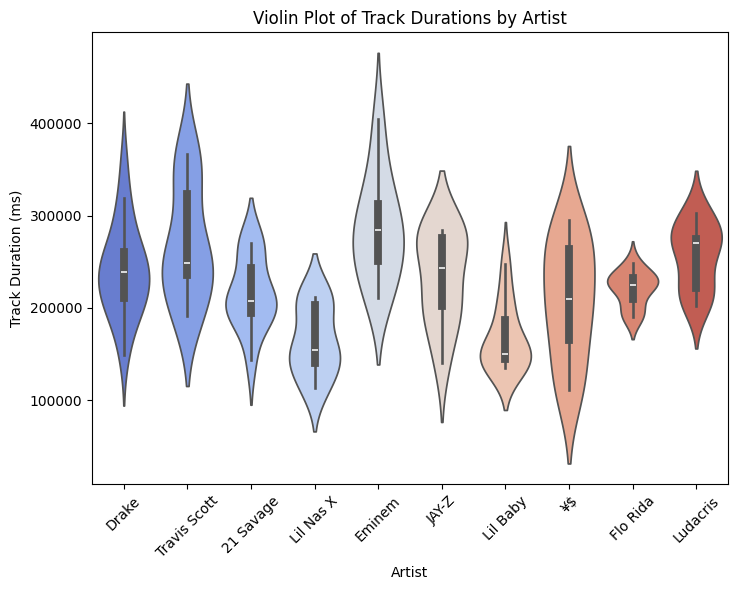

In [36]:
# Ans

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("spotify.csv")
# Convert 'Duration (ms)' column to numeric format
df["Duration (ms)"] = pd.to_numeric(df["Duration (ms)"], errors="coerce")
# Select top 10 artists with the most tracks for better visualization
top_artists = df["Artist"].value_counts().index[:10]
filtered_df = df[df["Artist"].isin(top_artists)]
# Create figure with subplots
plt.figure(figsize=(14, 6))
# Violin Plot
plt.subplot(1, 2, 2)
sns.violinplot(x=filtered_df["Artist"], y=filtered_df["Duration (ms)"], palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Artist")
plt.ylabel("Track Duration (ms)")
plt.title("Violin Plot of Track Durations by Artist")
plt.tight_layout()
plt.show()

10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
violin plot.
    - The distribution of track popularity varies across artists, with having some consistently high-rated tracks while others show a wider range of popularity. Violin or swarm plots help's to visualize these variations, highlighting whether an artist's tracks are generally well-received or have mixed popularity.

<ipython-input-38-a4e160ede2d0>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=filtered_df["Artist"], y=filtered_df["Popularity"], palette="coolwarm")


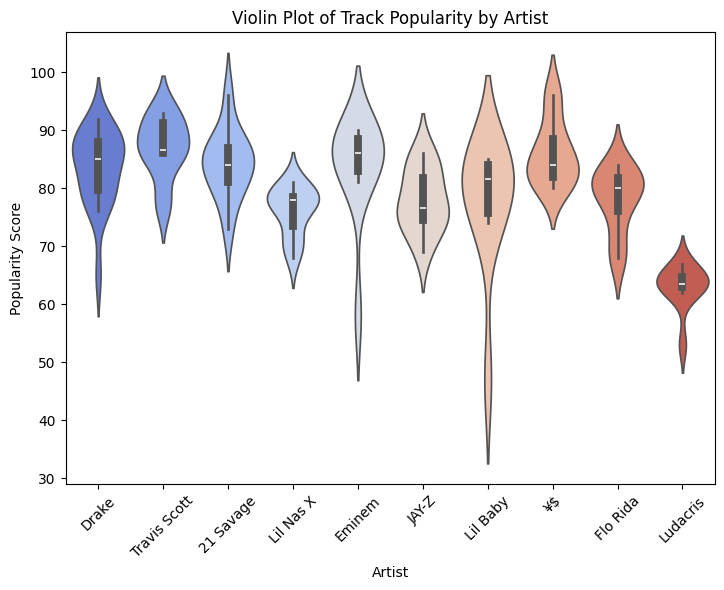

In [38]:
# Ans

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("spotify.csv")
# Convert columns to numeric format
df["Popularity"] = pd.to_numeric(df["Popularity"], errors="coerce")
# Select top 10 artists with the most tracks
top_artists = df["Artist"].value_counts().index[:10]
filtered_df = df[df["Artist"].isin(top_artists)]
# Create figure with subplots
plt.figure(figsize=(14, 6))
# Violin Plot
plt.subplot(1, 2, 1)
sns.violinplot(x=filtered_df["Artist"], y=filtered_df["Popularity"], palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Artist")
plt.ylabel("Popularity Score")
plt.title("Violin Plot of Track Popularity by Artist")
plt.tight_layout()
plt.show()